In [ ]:
#@title silence tensorflow because nobody needs errors :P
!pip install silence-tensorflow
from silence_tensorflow import silence_tensorflow
from google.colab import output
silence_tensorflow()
output.clear()

# Tools You (Probably) Won't Need to Use.
---
by Chloe-Noelle

A (wip) collection of tools I personally have no need for, but decided to implement for other people, who will most likely have no need for either. Why? Because I hate myself, and most importantly, I hate you.

### 1. Text

In [ ]:
#@title Semantic Arithmetic with Word2Vec
#@markdown With Gensim's Word2Vec, a dense vector is formed for every word it knows, with that vector we can do arithmetic, and find the closest vector to the result, and return the coresponding word.
#@markdown <br> Subtracting two words will leave the resulting vector too small to be meaningful, try calculating the average of two instead. <br>
#@markdown Wrap words in brackets like these "<word\>"
#@markdown <br> Then you can treat them like numbers, use any number of subtraction multiplication or addition signs between them to perform arithmetic on them.
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

#@markdown toggle to avoid reloading model
semantic_model_loaded = False #@param {"type":"boolean"}
if(semantic_model_loaded != True):
    print("Loading Word Embeddings..")
    # glove-wiki-gigaword-100 glove-twitter-25
    embeddings = api.load("glove-wiki-gigaword-100")
expression = "(\u003Cking>+\u003Clady>)/2"#@param {"type":"string"}

def parse_semantic_expression(expression=expression):

    # Split words and find their embeddings
    a = expression.replace("<", "embeddings['").replace(">","']")
    alphabet = "abcdefghijklmnopqrstuvwxyz'\" ->"
    clean = []
    for i in expression:
        if i in alphabet:
            clean.append(i)
    clean = ''.join(clean).split(">")[:-1]
    words = embeddings.similar_by_vector(eval(a), topn=10)

    # Remove words if they are part of the expression.
    new_words = []
    for i in words:
        clear = True
        for j in clean:
            if j in i:
                 clear = False 
        if(clear):
            new_words.append(i)
    return new_words
print("Potential Matches and their Coresponding Score")
print('\n'.join([str(i) for i in parse_semantic_expression()]))

Loading Word Embeddings..
[==================================================] 100.0% 128.1/128.1MB downloaded
Potential Matches and their Coresponding Score
('queen', 0.8334094882011414)
('prince', 0.7351105213165283)
('son', 0.7202234268188477)
('elizabeth', 0.7183598279953003)
('father', 0.708275556564331)
('brother', 0.7076902389526367)
('daughter', 0.7042185068130493)
('uncle', 0.6902905702590942)


In [ ]:
#@title Markov Chain Text Generation
#@markdown Definition of Markov Chain from [analyticsindiamag.com](https://analyticsindiamag.com/hands-on-guide-to-markov-chain-for-text-generation/)
#@markdown <br> "Markov chains are random determined processes with a finite set of states that move from one state to another. These sets of transitions from state to state are determined by some probability distribution."
import numpy as np
#@markdown the input text to build the model on
# I actually know barely anything about this code i stole it
input_text = "I'm a little teapot, Short and stout, Here is my handle Here is my spout When I get all steamed up, Hear me shout, Tip me over and pour me out!  I'm a very special teapot, Yes, it's true, Here's an example of what I can do, I can turn my handle into a spout, Tip me over and pour me out!" #@param {"type":"string"}
corpus = input_text.split()
def make_pairs(corpus):
    for i in range(len(corpus)-1):
        yield (corpus[i], corpus[i+1])
        
pairs = make_pairs(corpus)
word_dict = {}
for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]
first_word = np.random.choice(corpus)
chain = [first_word]
#@markdown the number of words to "generate" from the model
n_words = 20#@param
for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))
' '.join(chain)

"special teapot, Yes, it's true, Here's an example of what I get all steamed up, Hear me over and pour me"

In [ ]:
#@title GPT-Neo Text Generation
#@markdown https://www.eleuther.ai/projects/gpt-neo/ <br>
#@markdown GPT⁠-⁠Neo is the code name for a family of transformer-based language models loosely styled around the GPT architecture.
!pip install transformers
from transformers import pipeline
model = "EleutherAI/gpt-neo-1.3B"
generator = pipeline('text-generation', model=model)
from google.colab import output 
output.clear()
prompt = "Hi I'm Marvin, I like to"#@param {"type":"string"}
dgen = generator(prompt, 
                max_length=100,
                do_sample=True,
                min_length=10
                )[0]['generated_text']
print(dgen)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hi I'm Marvin, I like to hang out with my computer
I like to play some of the games I have
I don't like to play video games but I like to
play some of the online games
so if you don't mind just come on in and let
me play a game
I'm really good at playing these types of games
It's been a while
yeah yeah I got a good
video game you have a good time
yeah
this is not


### 2. Numbers

In [ ]:
#@title Compute Optimal Score to End A Turn at when Playing Pig with an N-Sided Die
#@markdown I got the idea from [this video](https://youtu.be/ULhRLGzoXQ0). <br>
#@markdown Pig is a game played with a die, you roll as many times as you want, you rack up as many points as possible until you either decide to stop, or you roll a 1. If you roll a 1 then you lose all the points for that turn.
#@markdown <br> At the end of your turn you add all the points from previous turns and that's your score. You can play against someone and set a goal, or play alone.
#@markdown <br> This uses a score-based turn stopping approach (not perfect, but best simple way to strategize).
#@markdown <br> you input the number of sides on the die you're using, and you get the score at which if you get above or equal, you should stop rolling because of diminishing returns and a higher probability of rolling a 1 and losing your points.
#@markdown <br> I've added the feature to specify the amount of different rolls that can take away your points (`sides_that_zero_your_score`), because you may want to customize the game to your liking.
#@markdown <br> <br> Obviously using 2 players to find an optimal score is much harder and requires extensive game theory, but this is a good start.
from sympy import *
init_printing()

num_sides =  6#@param
sides_that_zero_your_score =  1#@param
def search_pig(num_sides=num_sides, sides_that_zero_your_score=sides_that_zero_your_score):
    var('n')
    # find the average score
    avscore = round(sum(range(num_sides+2)[2:])/num_sides)

    # solve inequality
    return str(solve(((num_sides-sides_that_zero_your_score)/num_sides)*(avscore+n)>n)).split('<')[-1].replace(")", "").replace(" ", "")
print('For a game of Pig using a {} sided die with {} zero(s),'.format(num_sides, sides_that_zero_your_score))
print("End your turn when your score is less-than/around {}".format(search_pig()))

For a game of Pig using a 6 sided die with 1 zero(s),
End your turn when your score is less-than/around 20.0


### 3. Visual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


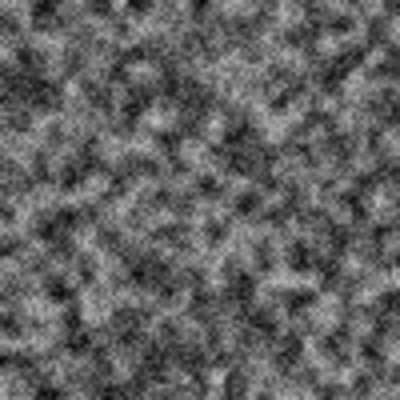

In [ ]:
#@title Generate Perlin Noise Field
#@markdown What is perlin noise? Idk https://en.wikipedia.org/wiki/Perlin_noise
import numpy as np
from PIL import Image
#@markdown shape is width x height
shape = "400x400" #@param {"type":"string"}
scale = 1#@param

def perlin_noise(shape, scale):
    # find height and width
    height = int(shape.split("x")[0])
    width = int(shape.split("x")[1])

    # layer different scales of noise on top of eachother
    noise_layers = np.array([np.random.random((width,height))*50 for (width,height) in [(int(width/16*scale), int(height/16*scale)), (int(width/8*scale), int(height/8*scale)), (int(width/4*scale), int(height/4*scale)), (int(width), int(height))]])
    noise_resize = [np.array(Image.fromarray(np.array(i, dtype=np.uint8)).resize((height,width))) for i in noise_layers]

    # add them all together (despite it being avg, i know, im lazy with renaming)
    noise_avg = noise_resize[0]
    for i in range(len(noise_resize[1:])): noise_avg=noise_avg+noise_resize[i]
    noise_avg=noise_avg

    return Image.fromarray(np.array(noise_avg, dtype=np.uint8))
perlin_noise(shape,scale)

In [ ]:
#@title Fire/Fireball Simulation
from PIL import Image, ImageFilter, ImageDraw
import numpy as np
!rm -r frames
from google.colab import output
#@markdown you have to run the previous cell to have the function for the required perlin noise for this to work <br>
#@markdown details of sim explained [here](https://web.archive.org/web/20160418004150/http://freespace.virgin.net/hugo.elias/models/m_fire.htm)
#@markdown <br> shape = width x height
shape = "400x400"#@param {"type":"string"}
width = int(shape.split("x")[1])
height = int(shape.split("x")[0])
fire_shape = "fireball" #@param ["normal", "fireball"]

# create cooling map from function above (or download one)
# !wget https://web.archive.org/web/20160418004150im_/http://freespace.virgin.net/hugo.elias/models/coolmap.jpg -O coolmap.jpg
# cooling_map = np.array(Image.open("coolmap.jpg").resize((height, width)).convert("RGB"))*0.1
flame_scale = 0.16 #@param {type:"slider", min:0, max:1, step:0.01}
cooling_map = np.array(perlin_noise(shape,1-flame_scale).convert("RGB"))*0.5

# create a folder called frames to save the rendered frames to
!mkdir frames

# the main flame class
class flame:
    def __init__(self, height, width, cooling_map):
        self.height = height
        self.width = width

        # the simulation itself
        self.sim = np.zeros((height,width,3))
        self.cooling_map = cooling_map

    # scroll the image up and re-draw the source of the flame
    def Convection(self):
        width_of_bar = 3
        self.sim = self.sim[width_of_bar:]
        for bar in range(width_of_bar):
            if(fire_shape=="normal"):
                self.sim = np.append(self.sim, np.array([np.ones(self.sim[-1].shape)*255]), axis = 0)
            else:
                self.sim = np.append(self.sim, np.array([np.zeros(self.sim[-1].shape)]), axis = 0)
                image = Image.fromarray(np.array(self.sim, dtype=np.uint8))
                draw = ImageDraw.Draw(image)
                x = int(width/2)
                y = int(height/2)+int(height/4)
                r = int(min([height,width])/6)
                leftUpPoint = (x-r, y-r)
                rightDownPoint = (x+r, y+r)
                twoPointList = [leftUpPoint, rightDownPoint]
                draw.ellipse(twoPointList, fill=(255,255,255))
                self.sim = np.array(image)

    # blur the image to simulate fire spread
    def Spread(self):
        self.sim = np.array(Image.fromarray(np.array(self.sim, dtype=np.uint8)).filter(ImageFilter.BLUR))
    
    # simulate cooling by dimming the image by the cooling map
    def Cooling(self):
        flame_height = 0.91 #@param {type:"slider", min:0, max:1, step:0.01}
        self.sim=self.sim-self.cooling_map*(1-flame_height)
        self.sim[self.sim < 0] = 0

        # scroll cooling map
        buffer_map = self.cooling_map 
        self.cooling_map = self.cooling_map[1:]
        self.cooling_map = np.append(self.cooling_map, [buffer_map[0]], axis=0)
    
    # save a specific frame
    def Render(self, iteration):
        Image.fromarray(np.array(self.sim, dtype=np.uint8)).save("frames/{}.png".format(str(iteration).rjust(4, "0")))
output.clear()

# Combine all processes together to create final simulation render
spread = 1 
frames = 200#@param
f = flame(width,height,cooling_map)
f.sim[-1]=np.ones(f.sim[-1].shape)*255
for i in range(frames):
    for step_scale in range(2):
        for s in range(spread):
            f.Spread()
        f.Convection()
        f.Cooling()
    f.Render(i)

# Compile frames as a video
!ffmpeg -i "frames/%04d.png" out.mp4 -y -r 60
output.clear()

# Display Video
from IPython.display import HTML
from base64 import b64encode
mp4 = open('out.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title Draw/Classify Written digit & Train MNIST Classifying Model (TF)
#@markdown This trains a small Feed Forward network on the MNIST Written Digits dataset. It can classify between numbers 0-9 with around 95% accuracy within just 3 epochs. <br>

#@markdown Untick this box if you've already trained it
train_model = True #@param{"type":"boolean"}
if(train_model):
    import tensorflow as tf
    import tensorflow_datasets as tfds
    (ds_train, ds_test), ds_info = tfds.load(
        'mnist',
        split=['train', 'test'],
        shuffle_files=True,
        as_supervised=True,
        with_info=True,
    )
    def normalize_img(image, label):
        """Normalizes images: `uint8` -> `float32`."""
        return tf.cast(image, tf.float32) / 255., label

    ds_train = ds_train.map(
        normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds_train = ds_train.cache()
    ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
    ds_train = ds_train.batch(256)
    ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)
    ds_test = ds_test.map(
        normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    ds_test = ds_test.batch(256)
    ds_test = ds_test.cache()
    ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.GaussianNoise(0.1),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )
    # model.summary()
    model.fit(
        ds_train,
        epochs=4,
        batch_size=1024,
        validation_data=ds_test,
    )

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
ctx.strokeStyle="#FFFFFF";
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""



def draw(filename='drawing.png', w=280, h=280, line_width=10):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
#   return len(binary)
print("Draw on this board!")
draw()
print("Classifying..")

import numpy as np
from PIL import Image, ImageOps

digit = ImageOps.grayscale(Image.open("drawing.png"))
digit = np.array(digit.resize((28,28)))
pred = model.predict((np.array([digit])/255))
pred = pred[0].tolist()
print("#-*"*20)
print("#"*20, "I predict... {}!".format(pred.index(max(pred))), "#"*20)
print("#-*"*20)

#### CLIP

In [ ]:
#@title Play Pictionary with CLIP
#@markdown in this game, you're given a word. You have to draw the word to the best of your ability, and then that drawing will be scored by OpenAI's model CLIP based on how well you did. If you did good enough, you get a point! Otherwise, you lose a point.
#@markdown <br> You can input a string of words, separated with commas, for categories to play in. You can also specify how many rounds till game over.
import subprocess
from google.colab import output
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
output.clear()
import torch
import numpy as np
import torchvision
import torchvision.transforms.functional as TF
import PIL
import matplotlib.pyplot as plt
import os
import random
import imageio
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import glob
%cd /content/
!git clone https://github.com/openai/CLIP.git
%cd /content/CLIP/
!pip install ftfy
import clip
import numpy as np
# Load the model
# perceptor, preprocess = clip.load('ViT-B/32', jit=False)
output.clear()

!git clone https://github.com/kingchloexx/CLIP-Image-Classification # if not in a notebook, run in console (w/o the "!")
import os
os.chdir("CLIP-Image-Classification")

from classify import load, classify, encode
output.clear()
####################################
####################################
####################################
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d style="border-style:solid"></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
ctx.strokeStyle="#FFFFFF";
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
from IPython.display import display
words = "cat, dog, worm, hamster, sonic the hedgehog, t-shirt"#@param {"type":"string"}
wordlist = words.split(", ")
load(wordlist)

rounds = 5#@param
canvas_size = "512x512"#@param {"type":"string"}
sizes = canvas_size.split("x")
def draw(filename='drawing.png', w=int(sizes[0]), h=int(sizes[1]), line_width=2):
  ht = HTML(canvas_html % (w, h, line_width))
  display(ht)
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
close = ["Woah!", "Nice!", "You Got It!"]
far = ["So Close!", "Next Time!", "Almost!"]

urscore = 0
for round in range(rounds):
    thing = np.random.choice(wordlist)
    if(round>0): print("CLIP Guessed {}".format(wordlist[score.index(max(score))]))
    print("Round {} | Your Score is.. {}".format(round, urscore))
    print("Draw A {} in the space below, and click Finish when you're done!".format(thing))
    draw()
    score = classify("drawing.png", return_raw=True)
    
    if(wordlist[score.index(max(score))]==thing):
        print(np.random.choice(close))
        urscore+=1
    else:
        print(np.random.choice(far))
        urscore+=-1
    output.clear()
if(round>0): print("CLIP Guessed {}".format(wordlist[score.index(max(score))]))
print("Your final score is.. {} out of {}!".format(urscore, rounds))

     |████████████████████████████████| 1.4MB 7.4MB/s 
     |████████████████████████████████| 92kB 11.7MB/s 
     |████████████████████████████████| 133kB 27.5MB/s 
     |████████████████████████████████| 7.5MB 20.7MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=8360e37ace3b3f924b20860ad97659143ea6ea17a3fef029f620982d62629420
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built fire
ERROR: botocore 1.20.62 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


100%|███████████████████████████████████████| 354M/354M [00:05<00:00, 67.1MiB/s]


setting seed of 0
you can override this with --seed argument in the command line, or --random for a randomly chosen one


100%|██████████| 800/800 [00:00<00:00, 156103.43B/s]


image updated at "./beautiful_glass_render.png"


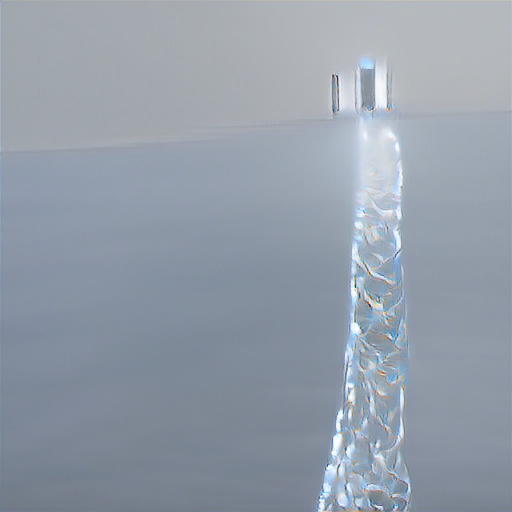

image updated at "./beautiful_glass_render.png"


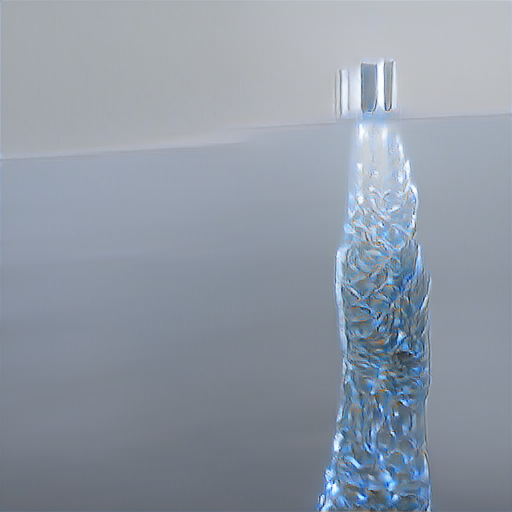

image updated at "./beautiful_glass_render.png"


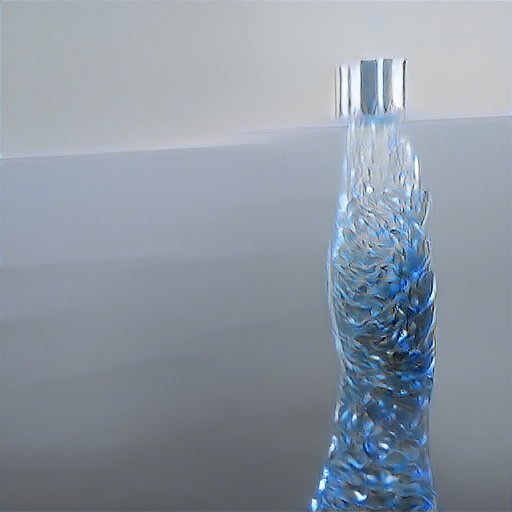

image updated at "./beautiful_glass_render.png"


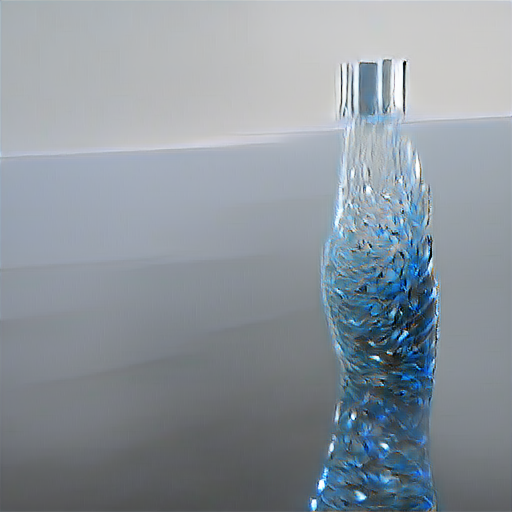

image updated at "./beautiful_glass_render.png"


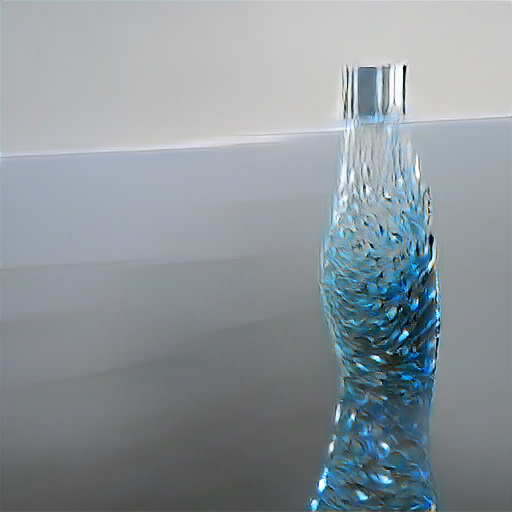

In [ ]:
#@title Big-Sleep - CLIP/BigGAN Image Generation
#@markdown https://github.com/lucidrains/big-sleep
!pip install big-sleep --upgrade
from tqdm.notebook import trange
from IPython.display import Image, display

from big_sleep import Imagine

TEXT = 'beautiful glass render' #@param {type:"string"}
SAVE_EVERY = 100 #@param {type:"number"}
SAVE_PROGRESS = True #@param {type:"boolean"}
LEARNING_RATE = 5e-2 #@param {type:"number"}
ITERATIONS = 1050 #@param {type:"number"}
SEED = 0 #@param {type: "number"}

model = Imagine(
    text = TEXT,
    save_every = SAVE_EVERY,
    lr = LEARNING_RATE,
    iterations = ITERATIONS,
    save_progress = SAVE_PROGRESS,
    seed = SEED
)

for epoch in trange(20, desc = 'epochs'):
    for i in trange(1000, desc = 'iteration'):
        model.train_step(epoch, i)

        if i == 0 or i % model.save_every != 0:
            continue

        filename = TEXT.replace(' ', '_')
        image = Image(f'./{filename}.png')
        display(image)

     |████████████████████████████████| 1.4MB 8.4MB/s 
     |████████████████████████████████| 3.3MB 21.9MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
Setting jit to False because torch version is not 1.7.1.


image updated at "./beautiful_glass_render.jpg"


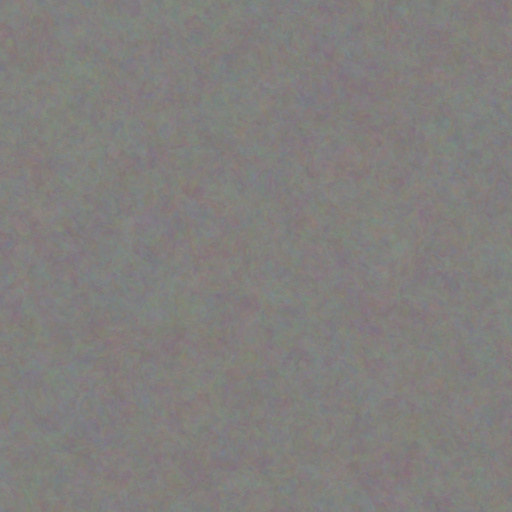

image updated at "./beautiful_glass_render.000001.jpg"


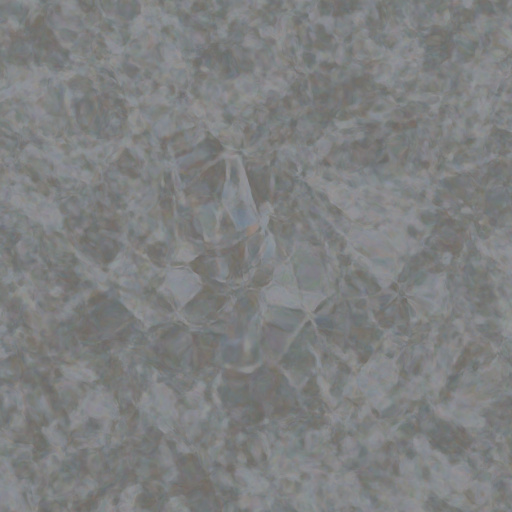

image updated at "./beautiful_glass_render.000002.jpg"


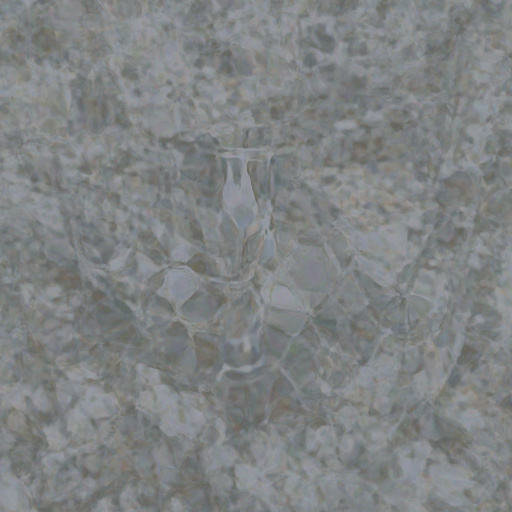

image updated at "./beautiful_glass_render.000003.jpg"


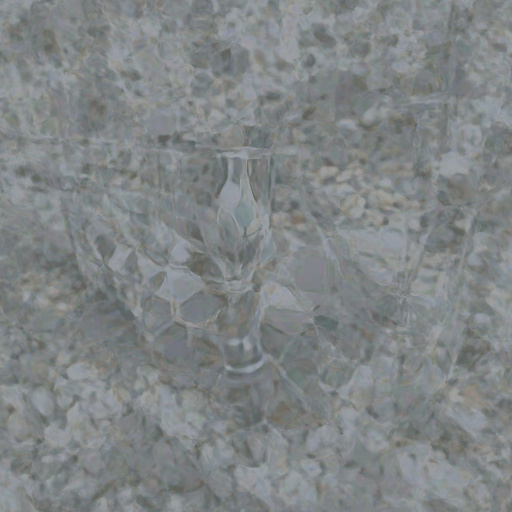

image updated at "./beautiful_glass_render.000004.jpg"


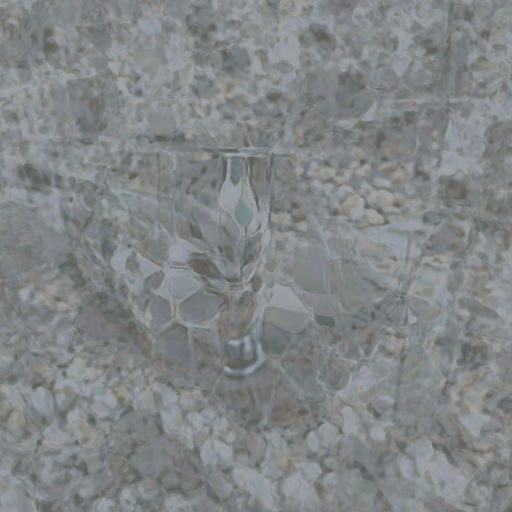

image updated at "./beautiful_glass_render.000005.jpg"


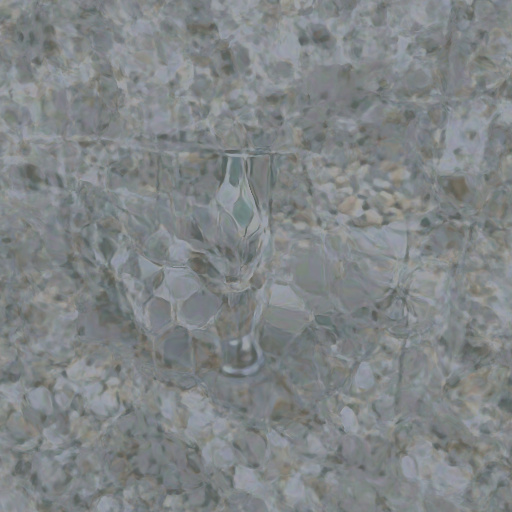

image updated at "./beautiful_glass_render.000006.jpg"


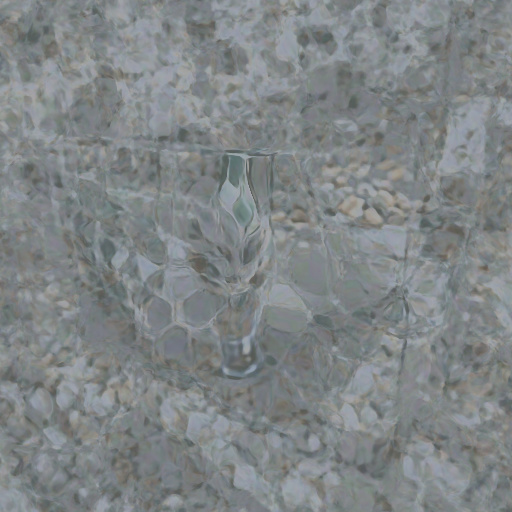

KeyboardInterrupt: ignored

In [1]:
#@title Deep-Daze CLIP/SIREN for Image Generation
#@markdown https://github.com/lucidrains/deep-daze
!pip install deep-daze --upgrade
from tqdm.notebook import trange
from IPython.display import Image, display

from deep_daze import Imagine

TEXT = 'beautiful glass render' #@param {type:"string"}
NUM_LAYERS = 32 #@param {type:"number"}
SAVE_EVERY =  20#@param {type:"number"}
IMAGE_WIDTH = 512 #@param {type:"number"}
SAVE_PROGRESS = True #@param {type:"boolean"}
LEARNING_RATE = 1e-5 #@param {type:"number"}
ITERATIONS = 1050 #@param {type:"number"}

model = Imagine(
    text = TEXT,
    num_layers = NUM_LAYERS,
    save_every = SAVE_EVERY,
    image_width = IMAGE_WIDTH,
    lr = LEARNING_RATE,
    iterations = ITERATIONS,
    save_progress = SAVE_PROGRESS
)

for epoch in trange(20, desc = 'epochs'):
    for i in trange(ITERATIONS, desc = 'iteration'):
        model.train_step(epoch, i)

        if i % model.save_every != 0:
            continue

        filename = TEXT.replace(' ', '_')
        image = Image(f'./{filename}.jpg')
        display(image)

Step: 260 | Avg: 0.694515 | Losses: 0.694515


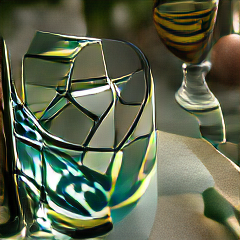

In [1]:
#@title DeepFart - Art with CLIP/VQGAN
#@markdown Named such because it just kind of farts out a piece that looks like shit
#@markdown <br> License: [Attribution-NonCommercial 4.0 International](https://creativecommons.org/licenses/by-nc/4.0/)
#@markdown <br> You Cannot use the output from this commercially.
#@markdown <br>\- [crumb](https://github.com/aicrumb)
prompts = "beautiful glass render" #@param {"type":"string"}
materials = prompts.split(", ")
# [materials.append(i+" <bad>") for i in 'graffiti,text,sad,confused'.split(',')]
starting_url = ""#@param {"type":"string"}
guide_urls = ""#@param {"type":"string"}
guide_urls=guide_urls.split(", ")
landscape_optimization = False 

!pip install accelerate
!rm -r /content/frames
!rm -r /content/video.mp4
from accelerate import Accelerator
import os
try:
  a = os.listdir("CLIP")
except:
    !git clone https://github.com/openai/CLIP
    !git clone https://github.com/CompVis/taming-transformers
    !pip install ftfy regex tqdm omegaconf pytorch-lightning
    !curl -L 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' > vqgan_imagenet_f16_1024.yaml
    !curl -L 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fckpts%2Flast.ckpt&dl=1' > vqgan_imagenet_f16_1024.ckpt
import argparse
import math
from pathlib import Path
from google.colab import output
import sys

power = "low" 
model = "1024"
sys.path.append('./taming-transformers')

use_lower = True 

from IPython import display
from omegaconf import OmegaConf
from PIL import Image
from taming.models import cond_transformer, vqgan
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm

from CLIP import clip

def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))

def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()

def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]
def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size

    input = input.view([n * c, 1, h, w])

    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])

    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])

    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)
    
def replace_grad(fake, real):
    return fake.detach() - real.detach() + real

class Prompt(nn.Module):
    def __init__(self, embed, weight=1., stop=float('-inf')):
        super().__init__()
        self.register_buffer('embed', embed)
        self.register_buffer('weight', torch.as_tensor(weight))
        self.register_buffer('stop', torch.as_tensor(stop))

    def forward(self, input):
        input_normed = F.normalize(input.unsqueeze(1), dim=2)
        embed_normed = F.normalize(self.embed.unsqueeze(0), dim=2)
        dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)
        dists = dists * self.weight.sign()
        return self.weight.abs() * replace_grad(dists, torch.maximum(dists, self.stop)).mean()

def parse_prompt(prompt):
    vals = prompt.rsplit(':', 2)
    vals = vals + ['', '1', '-inf'][len(vals):]
    return vals[0], float(vals[1]), float(vals[2])

class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            aaa = resample(cutout, (self.cut_size, self.cut_size)).clamp(0, 1)
            cutouts.append(aaa)
        
        return torch.cat(cutouts, dim=0)

def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model

if(len(starting_url)>4):
    !curl "$starting_url" > "/content/input_img.jpg" -q
    input_image = "/content/input_img.jpg"
else:
    input_image = None

print(guide_urls)
if(len(guide_urls)>=1):
    # !wget -i "$guide_url" -O /content/guide.jpg -q
    num_guide = 0
    for i in range(len(guide_urls)):
        # print(i)
        filename = "/content/guide{}.jpg".format(str(i))
        guide_url = guide_urls[i].replace(" <center>", "")
        !curl "$guide_url" > "$filename"
        num_guide += 1
    use_guide = True
else:
    use_guide = False
seed = 467

step_size = 0.06
low_power = False 
args = argparse.Namespace(
    prompts=[i for i in materials] if len(materials[0])>=1 else [],
    size=[244, 244],
    init_image=input_image,
    init_weight=-.6,
    clip_model="RN50",
    vqgan_config='vqgan_imagenet_f16_{}.yaml'.format(model),
    vqgan_checkpoint='vqgan_imagenet_f16_{}.ckpt'.format(model),
    step_size=step_size,
    cutn=64,
    cut_pow=1.,
    display_freq=10,
    seed=seed
)
accelerator = Accelerator()
device = accelerator.device

model = load_vqgan_model(args.vqgan_config, args.vqgan_checkpoint).to(device)
xxh = clip.load(args.clip_model, jit=False)
perceptor = xxh[0].eval().requires_grad_(False).to(device)
xpreprocess = xxh[1]

cut_size = perceptor.visual.input_resolution
e_dim = model.quantize.e_dim
make_cutouts = MakeCutouts(cut_size, args.cutn, cut_pow=args.cut_pow)
n_toks = model.quantize.n_e
toksX, toksY = args.size[0] // 16, args.size[1] // 16

torch.manual_seed(args.seed)

if args.init_image:
    pil_image = Image.open(args.init_image).convert('RGB')
    pil_image = pil_image.resize((toksX * 16, toksY * 16), Image.LANCZOS)
    z, *_ = model.encode(TF.to_tensor(pil_image).to(device).unsqueeze(0) * 2 - 1)
else:
    one_hot = F.one_hot(torch.randint(n_toks, [toksY * toksX], device=device), n_toks).float()
    z = one_hot.matmul(model.quantize.embedding.weight)
    z = z.view([-1, toksY, toksX, e_dim]).permute(0, 3, 1, 2)
z_orig = z.clone()
z.requires_grad_(True)
opt = optim.AdamW([z], lr=args.step_size) #, weight_decay=2e-2
normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],std=[0.26862954, 0.26130258, 0.27577711])

shape = "256x256"

width, height = [int(i) for i in shape.split("x")] 
good = '<good>'
bad = '<bad>'
main = '<center>'
pMs = []
center = []
model, opt = accelerator.prepare(model, opt)
for prompt in args.prompts:
    p = prompt.replace(bad, "").replace(good, "").replace(main, "")
    txt, weight, stop = parse_prompt(p)
    embed = perceptor.encode_text(clip.tokenize(txt).to(device)).float()
    if((bad in prompt) and main not in prompt):
      pMs.append(Prompt(embed, -weight, stop).to(device))
    elif((good in prompt) and main not in prompt):
      pMs.append(Prompt(embed, weight*1.5, stop).to(device))
    elif(bad in prompt and main in prompt):
      center.append(Prompt(embed, -weight, stop).to(device))
    elif(good in prompt and main in prompt):
      center.append(Prompt(embed, weight*1.5, stop).to(device))
    elif(main in prompt):
      center.append(Prompt(embed, weight, stop).to(device))

    else:
        # center.append(Prompt(embed, weight, stop).to(device))
        pMs.append(Prompt(embed, weight, stop).to(device))
    print(embed.shape)
    del embed
    del txt
    del weight
    del stop

import PIL
if(len(guide_urls[0])>=1):
    for i in range(len(guide_urls)):
        txt, weight, stop = parse_prompt("image")
        embed = xpreprocess(Image.open("/content/guide{}.jpg".format(i))).unsqueeze(0).to(device)
        embed = perceptor.encode_image(embed)
        if (main in guide_urls[i]):
            center.append(Prompt(embed, weight, stop).to(device))
        else:
            pMs.append(Prompt(embed, weight, stop).to(device))

def synth(z):
    z_q= model.quantize(z)[0]
    return model.decode(z_q).add(1).div(2).clamp(0, 1)
@torch.no_grad()
def checkin(i, losses):
    output.clear()
    losses_str = ', '.join(f'{loss.item():g}' for loss in losses[1:])
    tqdm.write(f'Step: {i} | Avg: {sum(losses[1:]).item()/len(losses[1:]):g} | Losses: {losses_str}')
    out = synth(z)
    a = TF.to_pil_image(out[0].cpu())
    a.save('progress.png')
    display.display(display.Image('progress.png'))

Sigmoid = torch.nn.Sigmoid()
import cv2
def ascend_txt():
    out = synth(z)
    a = TF.to_pil_image(out[0].cpu())
    blurriness = cv2.Laplacian(np.array(a), cv2.CV_64F).var()
    cutouts = make_cutouts(out)
    iii = perceptor.encode_image(normalize(cutouts.cuda())).float() #+(torch.randn(out.shape)*0.1)
    
    result = []
    if args.init_weight:
        result.append(F.mse_loss(z, z_orig) * args.init_weight / 2)
    for prompt in pMs:
        result.append(prompt(iii))
    
    if(len(center)>=1):
        for prompt in center:
            result.append(prompt(perceptor.encode_image(normalize(cutouts[-3:-2]))).float())
    del iii
    del out
    return result
def train(i):
    opt.zero_grad()
    lossAll = ascend_txt()
    if i % args.display_freq == 0:
        checkin(i, lossAll)
    loss = sum(lossAll[1:])
    accelerator.backward(loss)
    opt.step()
steps = 1000#@param
i = 0
maxlr = 0.6
one_cycle = torch.optim.lr_scheduler.OneCycleLR(opt, total_steps = steps, max_lr=maxlr, pct_start=0.2, final_div_factor=14, div_factor=10)
try:
    with tqdm() as pbar:
        while i<steps:
            train(i+1)
            i += 1
            
            pbar.update()
            # if(i<steps*0.7):=
            one_cycle.step()
            

except KeyboardInterrupt:
    pass